# Predicción de Cancer con una Neurona

## Paso 1. Importar paquetería necesaria 📦

In [213]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Paso 2. Cargar los datos 📊

In [214]:
data = pd.read_csv("../Datasets/Cancer.csv")

## Paso 3. Inspeccionar los datos 👀

Se muestran los primeros 5 registros en los datos para ver el formato de estos

In [215]:
data.head()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
0,5,1,1,1,2,1,3,1,1,1
1,5,4,4,5,7,10,3,2,1,1
2,3,1,1,1,2,2,3,1,1,1
3,6,8,8,1,3,4,3,7,1,1
4,4,1,1,3,2,1,3,1,1,1


Se muestra el tamaño del dataset

In [216]:
data.shape  # Tamano del dataset

(683, 10)

Estadisticas del dataset

In [217]:
data.describe()

,Clump,UnifSize,UnifShape,MargAdh,SingEpiSize,BareNuc,BlandChrom,NormNucl,Mit,Class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,0.650073
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.477296
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


Se puede observar lo que incluyen los datos, además se puede notar que la última columna del dataset es la que contiene la salida deseada (cancer o no) para cada paciente

## Paso 4. Separar características y salidas deseadas ✂️

In [218]:
X = data.iloc[:, :-1]  # Caracteristicas (entrada a la red)
y = data.iloc[:, -1]

## Paso 5. Normalizar los datos para obtener buenos resultados 📏

Como podemos recordar de clases pasadas, las redes neuronales son sensiblas a la escala de los datos, y observando los datos se puede notar que estos están en rangos muy diferentes, por lo que será necesario normalizarlos para obtener buenos resultados

In [219]:
X_scaled = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0))

## Paso 6. Separar los datos en entrenamiento y prueba 🧐

Para poder medir de manera correcta el desempeño de nuestro modelo y no obtener resultados sesgados, es necesario separar datos para evaluar nuestro modelo, los cuales serán datos que el modelo "no ha visto", es decir, que el modelo no fue entrenado con estos datos. Usaremos el 80% de los datos para entrenamiento y el 20% restante para prueba, la división se hará de manera aleatoria.

In [220]:
n = len(X_scaled)  # Numero de datos
idx = np.random.permutation(n)  # Obtener indices de los datos en orden aleatorio
tamano_train = int(n * 0.9)
idx_train = idx[:tamano_train]  # Indices de entrenamiento
idx_test = idx[tamano_train:]  # Indices de prueba
X_train = X_scaled.iloc[idx_train]
y_train = y.iloc[idx_train]
X_test = X_scaled.iloc[idx_test]
y_test = y.iloc[idx_test]

## Paso 7. Transponer los datos para que tengan la forma adecuada para la red 

Ahora se transponen los datos para que estos tengan la forma adecuada para entrar a la red, es decir, un paciente por cada columna, en vez de un paciente por fila, además de pasar los datos de DataFrame de Pandas a array de numpy

In [221]:
X_train = X_train.to_numpy().T
y_train = y_train.to_numpy()
X_test = X_test.to_numpy().T
y_test = y_test.to_numpy()

## Paso 8. Neurona Logística 🧠

Ahora se implementa el código de la neurona logística

In [222]:
class Logistic_Neuron:
    
    def __init__(self,  n_inputs, learning_rate=0.1):
        # Aleatorios entre -1 y 1
        self.w = -1 + 2 * np.random.rand(n_inputs)
        self.b = -1 + 2 * np.random.rand()
        self.eta = learning_rate
        
    def predict_proba(self, X):
        Z = np.dot(self.w, X) + self.b
        Y_est = 1 / (1 + np.exp(-Z))
        return Y_est
        
    def predict(self, X, umbral=0.5):
        return 1 * (self.predict_proba(X) > 0.5)

    def train(self, X, Y, epochs=50):
        _, p = X.shape
        # Para guardar el error
        errores = []
        for _ in range(epochs):
            Y_est = self.predict_proba(X)
            # Completa las siguientes líneas de código
            self.w += self.eta / p * ((Y - Y_est) @ X.T).reshape(-1)
            self.b += self.eta / p * np.sum(Y - Y_est)
            # Calcular el MSE
            mse = np.square(Y - Y_est).sum() / len(Y)
            errores.append(mse)
        # Graficar el error al final del entrenamiento
        plt.plot(range(epochs), errores)
        plt.xlabel("epoch")
        plt.ylabel("MSE")

## Paso 9. Entrenar la neurona 🏋️

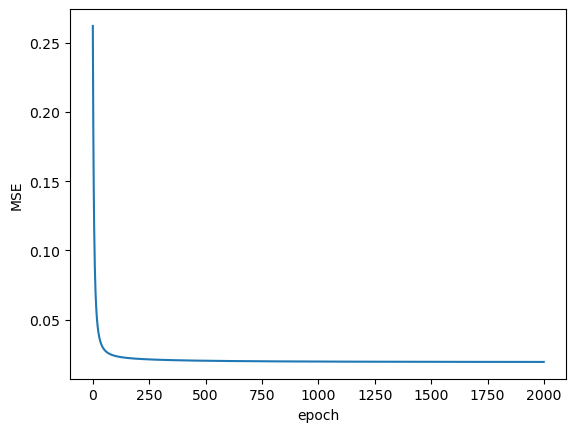

In [223]:
neuron = Logistic_Neuron(X_train.shape[0], 1)
neuron.train(X_train, y_train, epochs=2000)

## Paso 10. Evaluar la neurona con el set de prueba 📝

Primero realizamos predicciones con la neurona sobre el set de prueba

In [224]:
y_pred = neuron.predict(X_test)

Para evaluar la neurona usaremos la metrica de accuracy, esta métrica se define como el numero de aciertos de la neurona entre el total de predicciones realizadas por la neurona, esto es:
\begin{equation}
\text{accuracy} = \frac{\text{Preds correctas}}{\text{Total de preds}}
\end{equation}

In [225]:
accuracy = np.mean(y_pred==y_test)
print(f"El accuracy del modelo es de {accuracy}")

El accuracy del modelo es de 0.9565217391304348


Como se puede observar aquí, el accuracy es muy bajo, sin embargo no se pudo obtener un mayor accuracy, además de que en la gráfica del error se observa que el error ya no sigue disminuyendo después de entrenar el modelo por más épocas, esto puede ser debido a que la predicción del cancer no es un problema lineal por lo que habría que usar un modelo no lineal para poder obtener mejores resultados.